In [80]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

In [144]:
# Load the dataframe with image paths and expression values
data = pd.read_csv('df_train.csv')
data['path'] = 'data/' + data['path']
data = data[['path', 'CD79B']]
# normalise
# data['CD79B'] = (data['CD79B'] - data['CD79B'].min()) / (data['CD79B'].max() - data['CD79B'].min())
data.head()

,path,CD79B
0,data/CoreID101.tif,85.881503
1,data/CoreID102.tif,84.038087
2,data/CoreID105.tif,82.927907
3,data/CoreID107.tif,93.960336
4,data/CoreID108.tif,113.968536


In [145]:
# Split the data into train and test
train, test = train_test_split(data, test_size=0.2)

In [146]:
from keras.preprocessing.image import ImageDataGenerator

# Create the generators
train_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, vertical_flip=True)
test_gen = ImageDataGenerator(rescale=1./255)
train_generator = train_gen.flow_from_dataframe(train, x_col='path', y_col='CD79B', target_size=(224, 224), batch_size=8, class_mode='raw')
test_generator = test_gen.flow_from_dataframe(test, x_col='path', y_col='CD79B', target_size=(224, 224), batch_size=8, class_mode='raw')

Found 79 validated image filenames.
Found 20 validated image filenames.


In [147]:
# Create the model
model = Sequential()
model.add(Dense(1024, input_shape=(224, 224, 3), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='softmax'))
model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.1), metrics=['accuracy'])

C:\Users\sathy\OneDrive\Documents\GitHub\Glioblastoma_analysis\venv\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [149]:
# Train the model
model.fit_generator(train_generator, epochs=100, validation_data=test_generator, callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

Epoch 1/100


C:\Users\sathy\AppData\Local\Temp\ipykernel_15324\1370180345.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator, epochs=100, validation_data=test_generator, callbacks=[EarlyStopping(monitor='val_loss', patience=10)])


10/10 [==============================] - 3s 285ms/step - loss: 8761.0576 - accuracy: 0.0000e+00 - val_loss: 9257.1396 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 3s 280ms/step - loss: 8761.0566 - accuracy: 0.0000e+00 - val_loss: 9257.1387 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 3s 273ms/step - loss: 8761.0576 - accuracy: 0.0000e+00 - val_loss: 9257.1396 - val_accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 3s 274ms/step - loss: 8761.0576 - accuracy: 0.0000e+00 - val_loss: 9257.1406 - val_accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 3s 276ms/step - loss: 8761.0566 - accuracy: 0.0000e+00 - val_loss: 9257.1387 - val_accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 3s 278ms/step - loss: 8761.0566 - accuracy: 0.0000e+00 - val_loss: 9257.1396 - val_accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 3s 285ms/step - l

In [ ]:
# Save the model
model.save('model.h5')

In [150]:
# PLOT THE RESULTS
import matplotlib.pyplot as plt

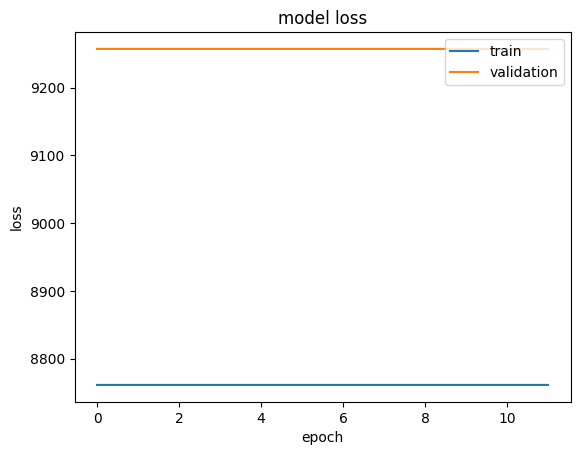

In [151]:
# Plot the training and validation loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [ ]:
# Load the test data
data = pd.read_csv('df_test.csv')
data['path'] = 'data/' + data['path']
data = data[['path', 'CD79B']]
data.head()

In [ ]:
# Create the generator for the test data
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(data, x_col='path', y_col='CD79B', target_size=(224, 224), batch_size=32, class_mode='raw')

In [ ]:
# Evaluate the model
model.evaluate_generator(test_generator)

In [ ]:
# Predict the values for the test data
pred = model.predict_generator(test_generator)

In [ ]:
# Save the predictions to a file
pd.DataFrame(pred).to_csv('predictions.csv')